<a href="https://colab.research.google.com/github/jiachun23/covid-19-img-classification-sample/blob/main/COVID_19_Lung_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#unzip the file
!unzip "/content/drive/MyDrive/covid19.zip" -d "/content/drive/MyDrive/covid_img/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: /content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: /content/drive/MyDrive/covid_img/COV

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

In [5]:
COVID_PATH = '/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/COVID'
NORMAL_PATH = '/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal'

In [6]:
os.makedirs('./COVID19-DATASET/train/covid19')
os.makedirs('./COVID19-DATASET/train/normal')

In [7]:
os.makedirs('./COVID19-DATASET/test/covid19')
os.makedirs('./COVID19-DATASET/test/normal')

In [8]:
os.makedirs('./COVID19-DATASET/valid/covid19')
os.makedirs('./COVID19-DATASET/valid/normal')

In [9]:
from distutils.dir_util import copy_tree
fromDirectory= '/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/COVID'
toDirectory='./COVID19-DATASET/train/covid19'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/train/covid19/COVID-1.png',
 './COVID19-DATASET/train/covid19/COVID-10.png',
 './COVID19-DATASET/train/covid19/COVID-100.png',
 './COVID19-DATASET/train/covid19/COVID-1000.png',
 './COVID19-DATASET/train/covid19/COVID-1001.png',
 './COVID19-DATASET/train/covid19/COVID-1002.png',
 './COVID19-DATASET/train/covid19/COVID-1003.png',
 './COVID19-DATASET/train/covid19/COVID-1004.png',
 './COVID19-DATASET/train/covid19/COVID-1005.png',
 './COVID19-DATASET/train/covid19/COVID-1006.png',
 './COVID19-DATASET/train/covid19/COVID-1007.png',
 './COVID19-DATASET/train/covid19/COVID-1008.png',
 './COVID19-DATASET/train/covid19/COVID-1009.png',
 './COVID19-DATASET/train/covid19/COVID-101.png',
 './COVID19-DATASET/train/covid19/COVID-1010.png',
 './COVID19-DATASET/train/covid19/COVID-1011.png',
 './COVID19-DATASET/train/covid19/COVID-1012.png',
 './COVID19-DATASET/train/covid19/COVID-1013.png',
 './COVID19-DATASET/train/covid19/COVID-1014.png',
 './COVID19-DATASET/train/covid19/COVI

In [10]:
fromDirectory= ('/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/COVID'[:1000])
toDirectory='./COVID19-DATASET/test/covid19'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/test/covid19/COVID-1.png',
 './COVID19-DATASET/test/covid19/COVID-10.png',
 './COVID19-DATASET/test/covid19/COVID-100.png',
 './COVID19-DATASET/test/covid19/COVID-1000.png',
 './COVID19-DATASET/test/covid19/COVID-1001.png',
 './COVID19-DATASET/test/covid19/COVID-1002.png',
 './COVID19-DATASET/test/covid19/COVID-1003.png',
 './COVID19-DATASET/test/covid19/COVID-1004.png',
 './COVID19-DATASET/test/covid19/COVID-1005.png',
 './COVID19-DATASET/test/covid19/COVID-1006.png',
 './COVID19-DATASET/test/covid19/COVID-1007.png',
 './COVID19-DATASET/test/covid19/COVID-1008.png',
 './COVID19-DATASET/test/covid19/COVID-1009.png',
 './COVID19-DATASET/test/covid19/COVID-101.png',
 './COVID19-DATASET/test/covid19/COVID-1010.png',
 './COVID19-DATASET/test/covid19/COVID-1011.png',
 './COVID19-DATASET/test/covid19/COVID-1012.png',
 './COVID19-DATASET/test/covid19/COVID-1013.png',
 './COVID19-DATASET/test/covid19/COVID-1014.png',
 './COVID19-DATASET/test/covid19/COVID-1015.png',
 './COV

In [11]:
from distutils.dir_util import copy_tree
fromDirectory= ('/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/COVID'[:200])
toDirectory='./COVID19-DATASET/valid/covid'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/valid/covid/COVID-1.png',
 './COVID19-DATASET/valid/covid/COVID-10.png',
 './COVID19-DATASET/valid/covid/COVID-100.png',
 './COVID19-DATASET/valid/covid/COVID-1000.png',
 './COVID19-DATASET/valid/covid/COVID-1001.png',
 './COVID19-DATASET/valid/covid/COVID-1002.png',
 './COVID19-DATASET/valid/covid/COVID-1003.png',
 './COVID19-DATASET/valid/covid/COVID-1004.png',
 './COVID19-DATASET/valid/covid/COVID-1005.png',
 './COVID19-DATASET/valid/covid/COVID-1006.png',
 './COVID19-DATASET/valid/covid/COVID-1007.png',
 './COVID19-DATASET/valid/covid/COVID-1008.png',
 './COVID19-DATASET/valid/covid/COVID-1009.png',
 './COVID19-DATASET/valid/covid/COVID-101.png',
 './COVID19-DATASET/valid/covid/COVID-1010.png',
 './COVID19-DATASET/valid/covid/COVID-1011.png',
 './COVID19-DATASET/valid/covid/COVID-1012.png',
 './COVID19-DATASET/valid/covid/COVID-1013.png',
 './COVID19-DATASET/valid/covid/COVID-1014.png',
 './COVID19-DATASET/valid/covid/COVID-1015.png',
 './COVID19-DATASET/valid/c

In [13]:
from distutils.dir_util import copy_tree
fromDirectory= ('/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal')
toDirectory='./COVID19-DATASET/train/normal'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/train/normal/Normal-1.png',
 './COVID19-DATASET/train/normal/Normal-10.png',
 './COVID19-DATASET/train/normal/Normal-100.png',
 './COVID19-DATASET/train/normal/Normal-1000.png',
 './COVID19-DATASET/train/normal/Normal-10000.png',
 './COVID19-DATASET/train/normal/Normal-10001.png',
 './COVID19-DATASET/train/normal/Normal-10002.png',
 './COVID19-DATASET/train/normal/Normal-10003.png',
 './COVID19-DATASET/train/normal/Normal-10004.png',
 './COVID19-DATASET/train/normal/Normal-10005.png',
 './COVID19-DATASET/train/normal/Normal-10006.png',
 './COVID19-DATASET/train/normal/Normal-10007.png',
 './COVID19-DATASET/train/normal/Normal-10008.png',
 './COVID19-DATASET/train/normal/Normal-10009.png',
 './COVID19-DATASET/train/normal/Normal-1001.png',
 './COVID19-DATASET/train/normal/Normal-10010.png',
 './COVID19-DATASET/train/normal/Normal-10011.png',
 './COVID19-DATASET/train/normal/Normal-10012.png',
 './COVID19-DATASET/train/normal/Normal-10013.png',
 './COVID19-DATASET/tra

In [14]:
from distutils.dir_util import copy_tree
fromDirectory= ('/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal'[:1000])
toDirectory='./COVID19-DATASET/test/normal'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/test/normal/Normal-1.png',
 './COVID19-DATASET/test/normal/Normal-10.png',
 './COVID19-DATASET/test/normal/Normal-100.png',
 './COVID19-DATASET/test/normal/Normal-1000.png',
 './COVID19-DATASET/test/normal/Normal-10000.png',
 './COVID19-DATASET/test/normal/Normal-10001.png',
 './COVID19-DATASET/test/normal/Normal-10002.png',
 './COVID19-DATASET/test/normal/Normal-10003.png',
 './COVID19-DATASET/test/normal/Normal-10004.png',
 './COVID19-DATASET/test/normal/Normal-10005.png',
 './COVID19-DATASET/test/normal/Normal-10006.png',
 './COVID19-DATASET/test/normal/Normal-10007.png',
 './COVID19-DATASET/test/normal/Normal-10008.png',
 './COVID19-DATASET/test/normal/Normal-10009.png',
 './COVID19-DATASET/test/normal/Normal-1001.png',
 './COVID19-DATASET/test/normal/Normal-10010.png',
 './COVID19-DATASET/test/normal/Normal-10011.png',
 './COVID19-DATASET/test/normal/Normal-10012.png',
 './COVID19-DATASET/test/normal/Normal-10013.png',
 './COVID19-DATASET/test/normal/Normal-100

In [15]:
from distutils.dir_util import copy_tree
fromDirectory= ('/content/drive/MyDrive/covid_img/COVID-19_Radiography_Dataset/Normal'[:200])
toDirectory='./COVID19-DATASET/valid/normal'
copy_tree(fromDirectory, toDirectory)

['./COVID19-DATASET/valid/normal/Normal-1.png',
 './COVID19-DATASET/valid/normal/Normal-10.png',
 './COVID19-DATASET/valid/normal/Normal-100.png',
 './COVID19-DATASET/valid/normal/Normal-1000.png',
 './COVID19-DATASET/valid/normal/Normal-10000.png',
 './COVID19-DATASET/valid/normal/Normal-10001.png',
 './COVID19-DATASET/valid/normal/Normal-10002.png',
 './COVID19-DATASET/valid/normal/Normal-10003.png',
 './COVID19-DATASET/valid/normal/Normal-10004.png',
 './COVID19-DATASET/valid/normal/Normal-10005.png',
 './COVID19-DATASET/valid/normal/Normal-10006.png',
 './COVID19-DATASET/valid/normal/Normal-10007.png',
 './COVID19-DATASET/valid/normal/Normal-10008.png',
 './COVID19-DATASET/valid/normal/Normal-10009.png',
 './COVID19-DATASET/valid/normal/Normal-1001.png',
 './COVID19-DATASET/valid/normal/Normal-10010.png',
 './COVID19-DATASET/valid/normal/Normal-10011.png',
 './COVID19-DATASET/valid/normal/Normal-10012.png',
 './COVID19-DATASET/valid/normal/Normal-10013.png',
 './COVID19-DATASET/val

In [16]:
train_path = './COVID19-DATASET/train'
val_path = './COVID19-DATASET/valid'
test_path = './COVID19-DATASET/test'

In [17]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # 1) Normal 2) COVID-19

In [20]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

print("The Class are {} and the class type has {} types.".format(CLASSES, NUM_CLASSES))

The Class are ['normal', 'covid19'] and the class type has 2 types.


In [21]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [22]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 13808 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Import the images from the test dataset.

test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 13808 images belonging to 2 classes.


In [25]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [26]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [27]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [28]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
# set the cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
432/432 [==============================] - 327s 756ms/step - loss: 0.2284 - accuracy: 0.9080 - val_loss: 0.1298 - val_accuracy: 0.9534
Epoch 2/5
432/432 [==============================] - 319s 739ms/step - loss: 0.1793 - accuracy: 0.9309 - val_loss: 0.1736 - val_accuracy: 0.9312
Epoch 3/5
432/432 [==============================] - 325s 752ms/step - loss: 0.1456 - accuracy: 0.9435 - val_loss: 0.0967 - val_accuracy: 0.9649
Epoch 4/5
432/432 [==============================] - 318s 735ms/step - loss: 0.1440 - accuracy: 0.9437 - val_loss: 0.1113 - val_accuracy: 0.9550
Epoch 5/5
432/432 [==============================] - 313s 726ms/step - loss: 0.1421 - accuracy: 0.9463 - val_loss: 0.0975 - val_accuracy: 0.9644


In [34]:
model.save('/content/drive/MyDrive/covid19_img-cls.h5')

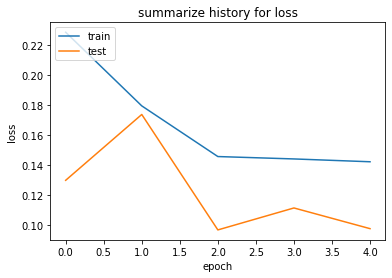

In [40]:
# summarize history for loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

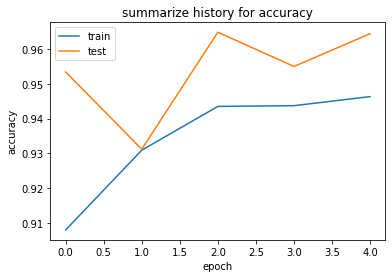

In [41]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()